# Time Series Forecasting of Domestic Deposits for FDIC-Insured Institutions Using SARIMAX

## Targeted Questions
We aim to answer the following questions:
1. **Intepretability** How do macroeconomic indicators, including GDP, Treasury Rate, Unemployment Rate, Housing Price, and Consumer Price Rate (CPI), influence or correlate with changes in total domestic deposits in the United States?
2. **Forecast** How would domestic deposits' behavior change under different future scenarios? To simulate reasonable future scenarios, we refer to the four stress test scenarios introduced by the Federal Reserve System.
3. **Impact** How could the Bank do to gain/avoid the potential profit/loss under different future scenarios

In [31]:
# Identify the current working directory
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/ching-lung/deposit-prediction/ARIMA


## Import Packages

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Import Dataset

In [39]:
# Load the .dta file into a DataFrame
df = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/data_clean.csv")
# df.columns
df.head(1)

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,...,Real GDP,Nominal disposable income,Real disposable income,Loans to individuals,Credit cards,Other loans to individuals,Deposits,Interest-bearing deposits,Noninterest-bearing deposits,Time deposits
0,1984Q1,8.1,12.5,7.9,12.7,7.9,5.8,9.2,11.7,11.9,...,4370.98,30668.53,3494.1,261504,46521,214984,2697459,1860467,363956,1242574


## Data Descriptions

The **Quarterly Banking Profile (QBP)** is a publication by the Federal Deposit Insurance Corporation (FDIC) that provides aggregated financial data and performance metrics for all FDIC-insured institutions, including commercial banks and savings institutions. It covers various financial indicators such as income, condition, structural changes, loan performance, and risk metrics. 

Key features of the QBP include:

1. **Aggregated Financial Data**: Tables present condition and performance ratios, past due and noncurrent loans, charge-offs, and other relevant metrics by asset size, geography, and type of institution.
   
2. **Community Bank Insights**: Separate tables focus on community banks, defined based on FDIC’s specific criteria, emphasizing their unique financial characteristics.

3. **Deposit Insurance Fund Metrics**: Provides data on the Deposit Insurance Fund, problem institutions, and insured deposits.

4. **Data Sources**: Data is primarily derived from Consolidated Reports of Condition and Income (Call Reports) and Thrift Financial Reports filed by FDIC-insured institutions.

5. **Computation and Adjustments**: Includes methodologies for ratio computations, adjustments for mergers, and measures to address double-counting in aggregated data.

The QBP is a key resource for understanding the financial health and trends of the banking sector, including detailed information on risk exposure, operational performance, and market dynamics.

## Exploratory Data Analysis

To begin with we plot the trend of the total deposit for all FDIC institutions.

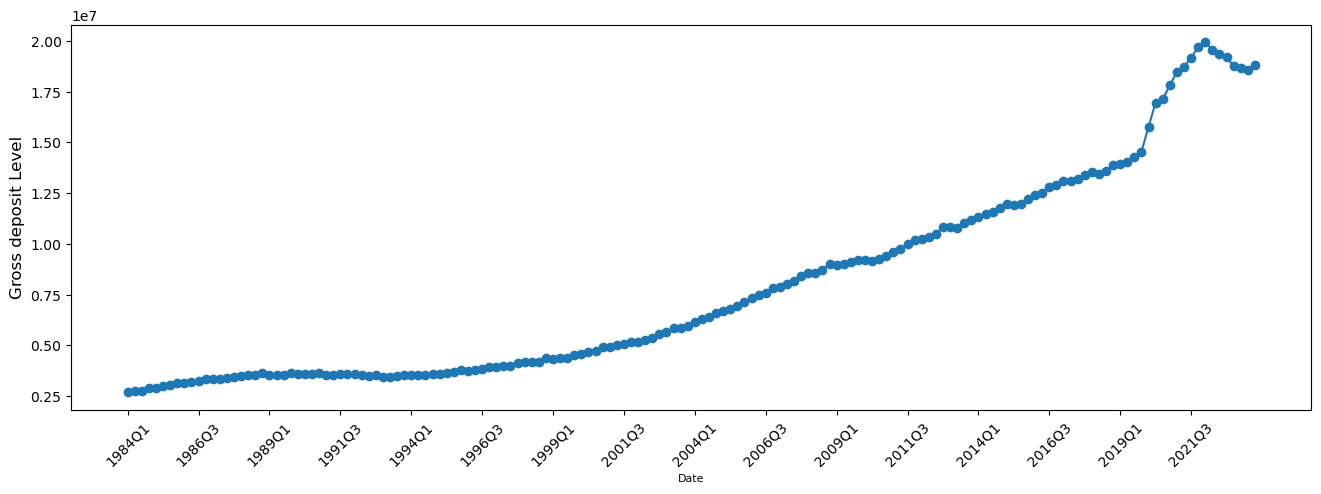

In [59]:
plt.figure(figsize=(16,5))
plt.plot(df.Date, df["Deposits"], '-o')
plt.xticks(df.Date[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)
plt.show()

## Feature Plots

Next, we also plot the trend of several macroeconomic predictors. Here’s a brief description of the mentioned macroeconomic predictors:

1. **Real GDP (Gross Domestic Product)**: Measures the total value of goods and services produced in an economy, adjusted for inflation. It reflects the overall economic activity and health.

2. **Unemployment Rate**: The percentage of the labor force actively seeking work but unable to find employment. It indicates labor market conditions and economic stability.

3. **Mortgage Rate**: The average interest rate charged on loans for purchasing homes. It reflects borrowing costs in the housing market and is influenced by broader interest rate trends.

4. **Prime Rate**: The interest rate that commercial banks charge their most creditworthy customers, typically influencing borrowing costs across the economy.

5. **CPI (Consumer Price Index) Inflation Rate**: This measure measures the average change over time in the prices paid by consumers for goods and services. It reflects the rate of inflation and purchasing power trends.

6. **3-Month Treasury Rate**: The yield on short-term U.S. government debt with a maturity of three months. It is a benchmark for risk-free interest rates and reflects monetary policy and market conditions.

7. **House Price Index (HPI)**: Tracks changes in residential real estate prices over time, indicating trends in the housing market and overall economic conditions related to property investment. 

These predictors are essential for understanding economic dynamics and are widely used in forecasting and modeling financial and economic trends.

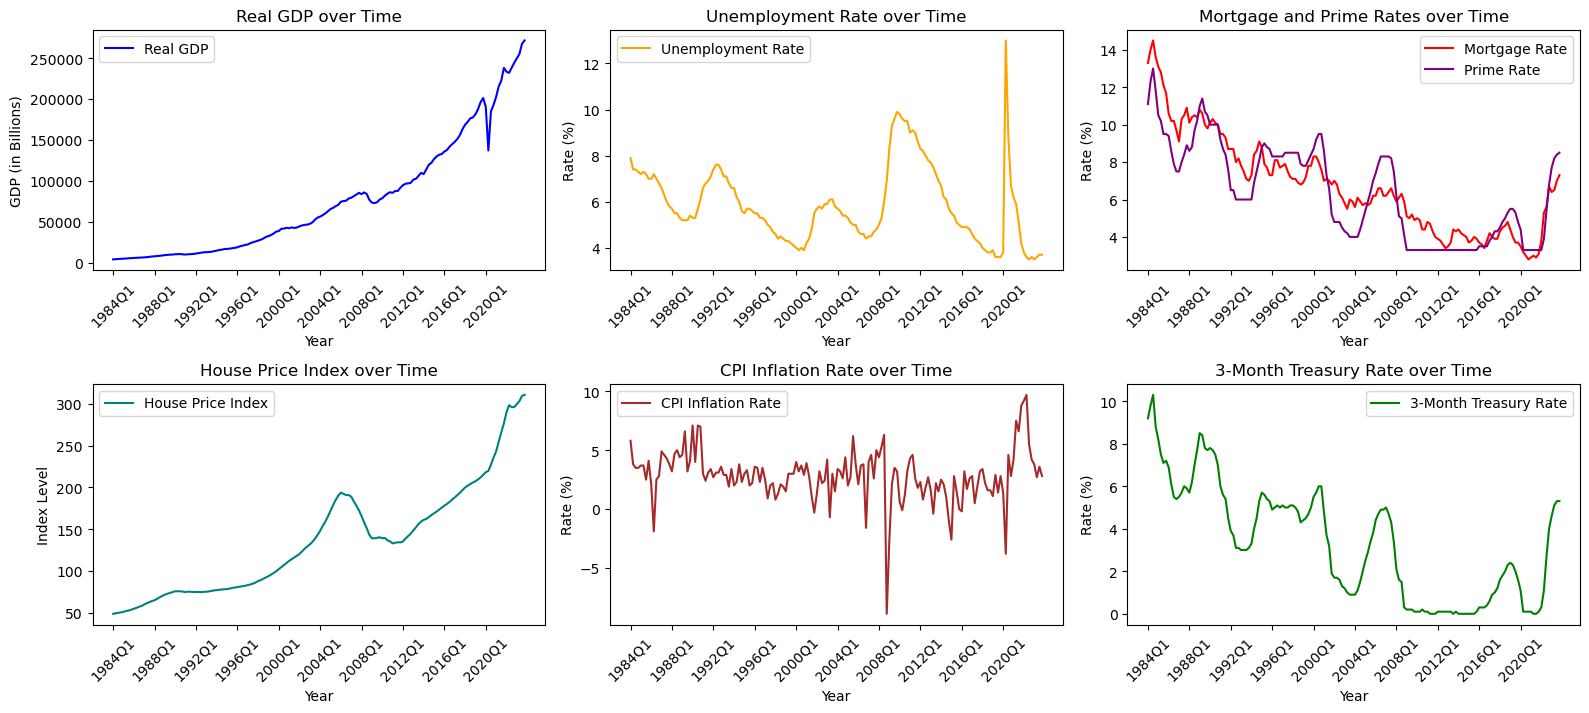

In [75]:
plt.figure(figsize=(16, 10))

# Subplot 1: Real GDP
plt.subplot(3, 3, 1)
plt.plot(df.Date, df['Real GDP'], label='Real GDP', color='blue')
plt.title('Real GDP over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 2: Unemployment Rate
plt.subplot(3, 3, 2)
plt.plot(df.Date, df['Unemployment rate'], label='Unemployment Rate', color='orange')
plt.title('Unemployment Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 3: Mortgage & Prime Rate
plt.subplot(3, 3, 3)
plt.plot(df.Date, df['Mortgage rate'], label='Mortgage Rate', color='red')
plt.plot(df.Date, df['Prime rate'], label='Prime Rate', color='purple')
plt.title('Mortgage and Prime Rates over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 4: House Price Index
plt.subplot(3, 3, 4)
plt.plot(df.Date, df['House Price Index (Level)'], label='House Price Index', color='teal')
plt.title('House Price Index over Time')
plt.xlabel('Year')
plt.ylabel('Index Level')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 5: CPI Inflation Rate
plt.subplot(3, 3, 5)
plt.plot(df.Date, df['CPI inflation rate'], label='CPI Inflation Rate', color='brown')
plt.title('CPI Inflation Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 6: 3-Month Treasury Rate
plt.subplot(3, 3, 6)
plt.plot(df.Date, df['3-month Treasury rate'], label='3-Month Treasury Rate', color='green')
plt.title('3-Month Treasury Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Correlation Heatmap

Next, we plot the corrleations plot among features and the targeted response: **deposit**. As we can see from the graph below, **deposits** are highly correlated with GDP related index and mildly correlated with treasuray related predictors.

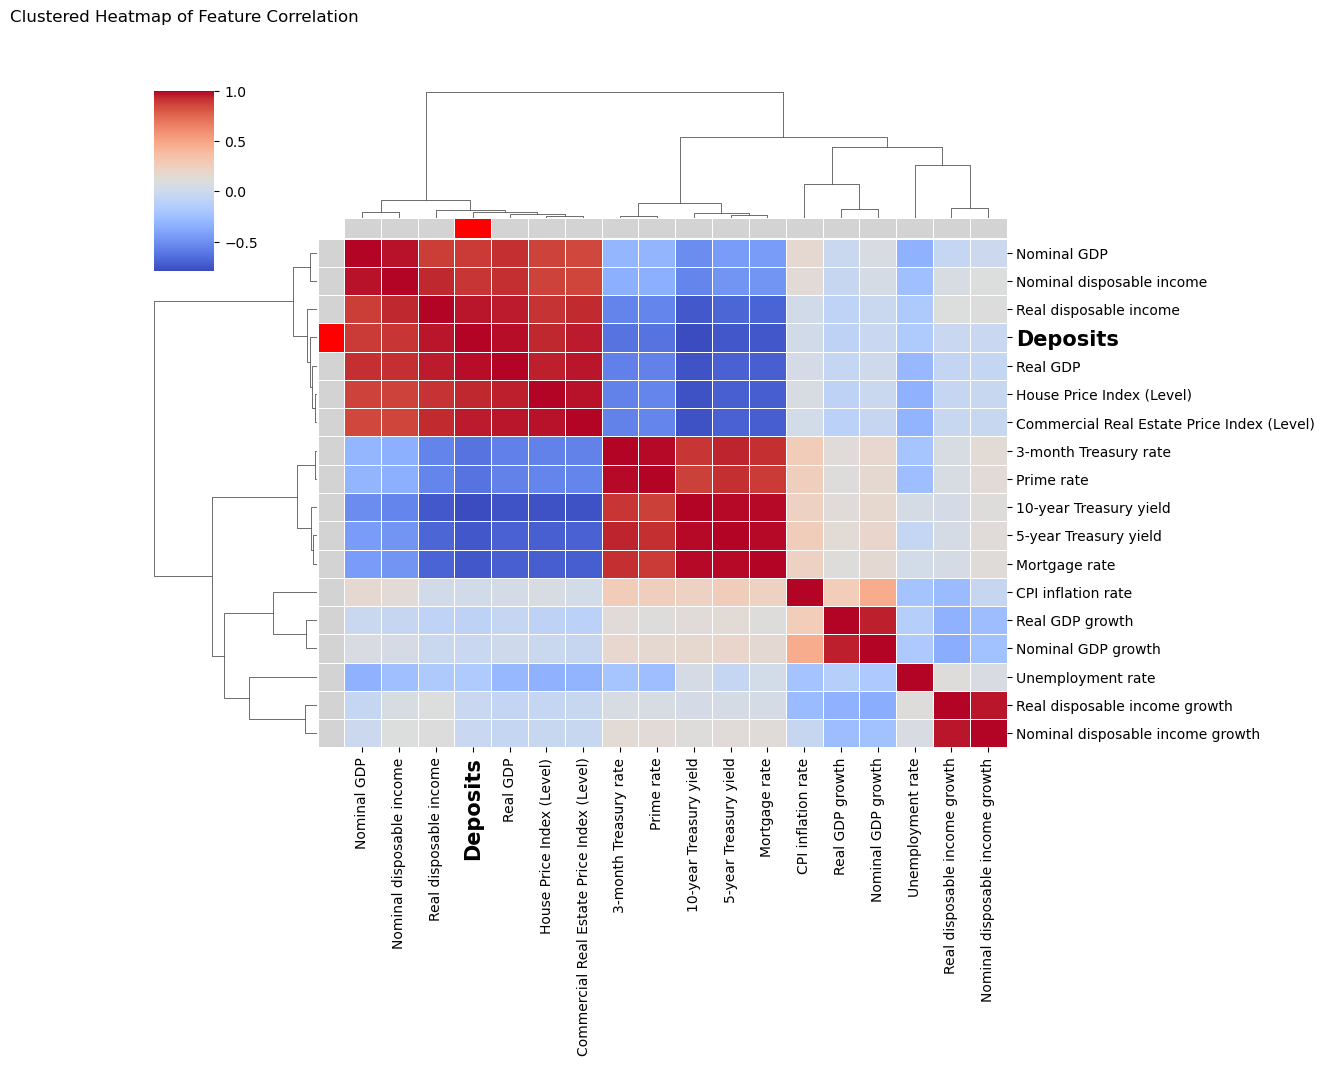

In [78]:
# Assuming 'df' is already defined
selected_columns = list(range(1, 18)) + [21]
correlation_matrix = df.iloc[:, selected_columns].corr()

# Create a mapping for label colors, highlight column 21
col_colors = ['lightgray'] * correlation_matrix.shape[0]
col_colors[-1] = 'red'  # Highlight the last column (column 21)

# Create the clustermap
clustermap = sns.clustermap(
    correlation_matrix,
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(12, 10),
    col_colors=col_colors,  # Column colors
    row_colors=col_colors,  # Row colors
)

# Make the deposit column label bold
x_labels = clustermap.ax_heatmap.get_xticklabels()
y_labels = clustermap.ax_heatmap.get_yticklabels()

# Highlight the deposit label on both axes
x_labels[3].set_fontweight('bold')
y_labels[3].set_fontweight('bold')
x_labels[3].set_fontsize(15)  # Adjust font size
y_labels[3].set_fontsize(15)  # Adjust font size

# Apply changes back to the plot
clustermap.ax_heatmap.set_xticklabels(x_labels, rotation=90)
clustermap.ax_heatmap.set_yticklabels(y_labels)

# Add a title
plt.title('Clustered Heatmap of Feature Correlation', pad=50)
plt.show()

## ADF Test

Augmented Dickey-Fuller (ADF) test: This is a statistical test that checks for the presence of a unit root in the time series data. A unit root indicates that the data is non-stationary. If the p-value of the test is less than a chosen significance level (e.g., 0.05), then the null hypothesis of a unit root is rejected and the data is considered stationary.

In [16]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Function to apply ADF test and return results
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # Dropping NA values to avoid errors
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }
    return pd.DataFrame(output, index=[column_name])

# Running ADF test on the deposits
adf_deposits = adf_test(df.Deposits, "Deposit")
adf_deposits

,Test Statistic,p-value,Lags Used,Number of Observations,Critical Values
Deposit,3.176465,1.0,14,145,NaN


## ACF and PACF plots

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to identify the order of the AR (Autoregressive) and MA (Moving Average) terms in an ARIMA model.

The ACF plot shows the correlation between the time series and its lagged values. The PACF plot shows the correlation between the time series and its lagged values, after removing the effects of the intermediate lags.

Here's how to interpret the ACF and PACF plots:

ACF plot: If the ACF plot shows a sharp drop-off after a certain lag, it suggests that the time series is stationary and an AR model may be appropriate. If the ACF plot shows a gradual decay, it suggests that the time series may be non-stationary and a differencing operation may be required.

PACF plot: If the PACF plot shows a sharp drop-off after a certain lag, it suggests that an AR model may be appropriate. If the PACF plot shows a gradual decay, it suggests that an MA model may be appropriate.

Combined ACF and PACF plots: If the ACF plot shows a gradual decay and the PACF plot shows a sharp drop-off after a certain lag, it suggests that an ARMA model may be appropriate.

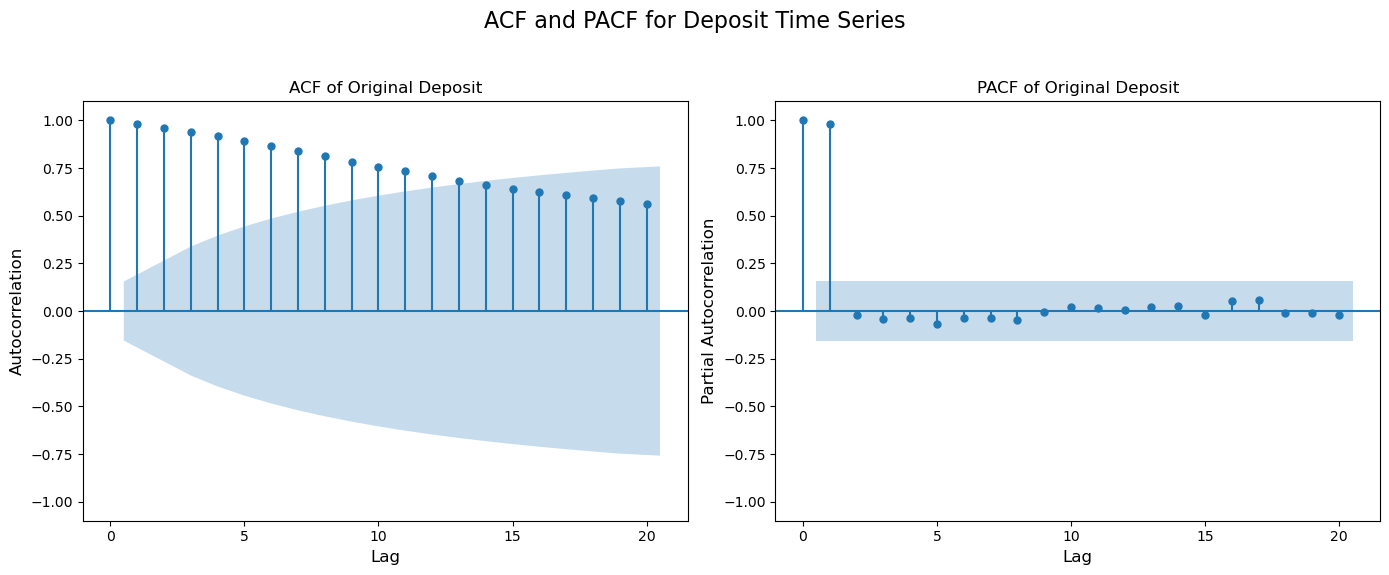

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Compute ACF and PACF for the differenced series
lags = 20  # Number of lags to plot
acf_differenced = acf(df.Deposits, nlags=lags, fft=True)  # Use the differenced series
pacf_differenced = pacf(df.Deposits, nlags=lags)

# Plot the ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("ACF and PACF for Deposit Time Series", fontsize=16)

# ACF plot using statsmodels
sm.graphics.tsa.plot_acf(df.Deposits, lags=lags, ax=axes[0], title="ACF of Original Deposit")
axes[0].set_ylabel("Autocorrelation", fontsize=12)
axes[0].set_xlabel("Lag", fontsize=12)
axes[0].set_ylim(-1.1, 1.1)

# PACF plot using statsmodels
sm.graphics.tsa.plot_pacf(df.Deposits, lags=lags, ax=axes[1], title="PACF of Original Deposit")
axes[1].set_ylabel("Partial Autocorrelation", fontsize=12)
axes[1].set_xlabel("Lag", fontsize=12)
axes[1].set_ylim(-1.1, 1.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Differencing

**Differencing** is a transformation technique that removes trends and seasonality from a time series, making it stationary by calculating differences between consecutive data points.

#### Formula
For a series \(y_t\):
- **First difference**: \(y'_t = y_t - y_{t-1}\)
- **Second difference**: \(y''_t = y'_t - y'_{t-1}\)

#### Importance in ARIMA
In ARIMA (**AutoRegressive Integrated Moving Average**), differencing addresses the "Integrated" component, ensuring the series is stationary. This is critical because:
1. **Stationarity**: ARIMA assumes stationary data for reliable modeling.
2. **Integration**: The parameter \(d\) represents the number of differencing steps needed:
   - \(d = 0\): Data is stationary.
   - \(d = 1\): First differencing.
   - \(d = 2\): Second differencing.

Differencing stabilizes the mean and removes trends, enabling AR (AutoRegressive) and MA (Moving Average) components to model underlying patterns effectively.

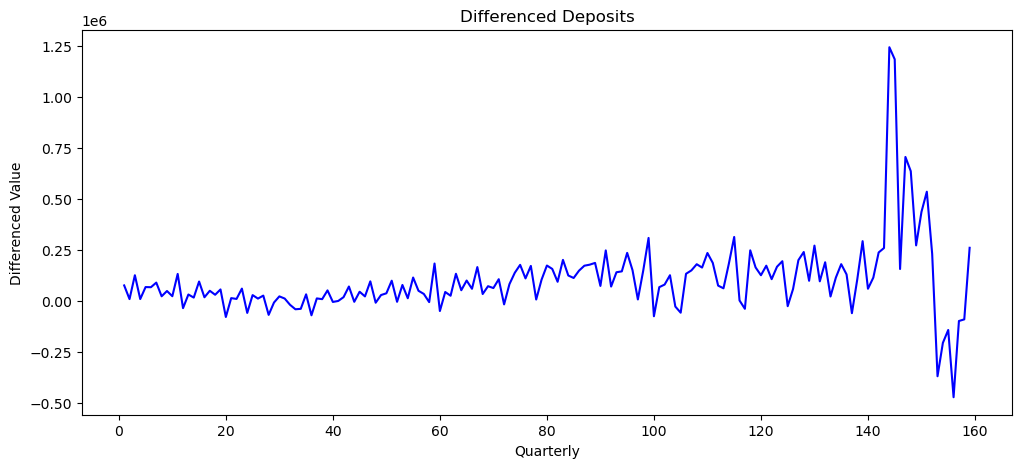

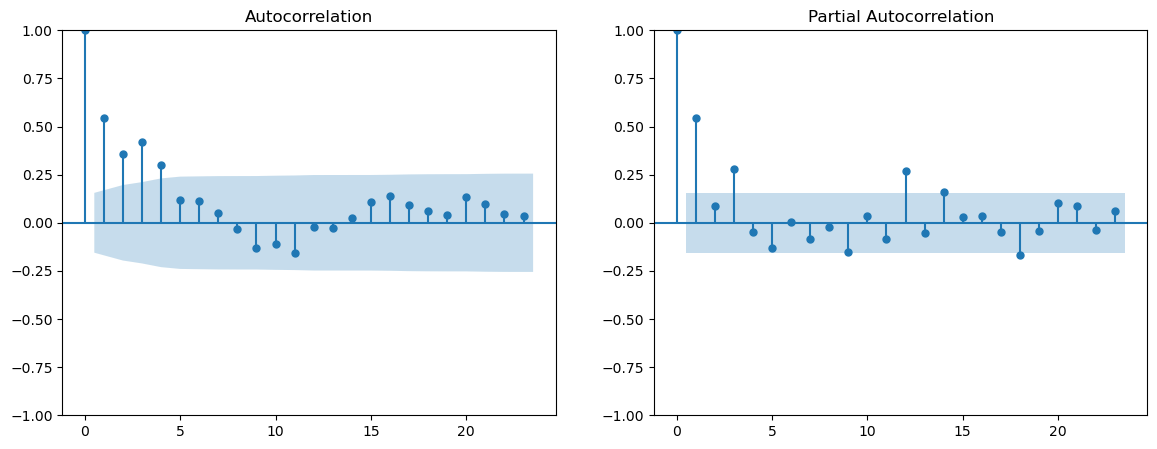

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the 'Non-maturity Interest-bearing deposits' series to make it stationary
dg = df.Deposits.copy().diff(1).dropna()

# Plot the differenced series to check for stationarity visually
plt.figure(figsize=(12, 5))
plt.plot(dg, color='blue')
plt.title('Differenced Deposits')
plt.xlabel('Quarterly')
plt.ylabel('Differenced Value')
plt.show()

# Step 2: Plot ACF and PACF to determine the order of ARIMA
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(dg, ax=ax[0])
plot_pacf(dg, ax=ax[1])

plt.show()

In [24]:
# Running ADF test on the deposits
adf_deposits_diff = adf_test(dg, "Deposit Difference")
adf_deposits_diff

,Test Statistic,p-value,Lags Used,Number of Observations,Critical Values
Deposit Difference,-0.654949,0.858076,14,144,NaN


Some comments about ARIMA, SARIMA, and SARIMAX...

In [44]:
df.shape

(160, 25)

## Train-Test Split

In [46]:
# Train-Test split for time series dataset

size = int(0.2*df.shape[0])
df_train = df.iloc[:-size].copy()
df_test = df.drop(df_train.index).copy()

dep_train = df['Deposits'].iloc[:-size].copy()
predictors_train = df.iloc[:,1:17][:-size].copy()
date_train = df['Date'].iloc[:-size].copy()

dep_test = df.drop(dep_train.index).copy()
predictors_test = df.iloc[:,1:17].drop(predictors_train.index).copy()
date_test = df.drop(date_train.index).copy()


### Feature Selection

In [57]:
# # Compute correlation matrix
# correlation_matrix = predictors_train.corr()

# # Identify pairs of highly correlated features (absolute correlation > threshold)
# threshold = 0.85
# correlated_features = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             correlated_features.add(correlation_matrix.columns[i])

# # Remove one feature from each pair
# selected_features = predictors_train.columns.difference(correlated_features)
# print("Selected Features:", selected_features)

# # Use only selected features
# predictors_train_reduced = predictors_train[selected_features]
# predictors_test_reduced = predictors_test[selected_features]

Selected Features: Index(['3-month Treasury rate', 'CPI inflation rate',
       'House Price Index (Level)', 'Real GDP growth',
       'Real disposable income growth', 'Unemployment rate'],
      dtype='object')


## Feature Standardization

In [73]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Standardize the features
scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train)  # Standardize training data
predictors_test_scaled = scaler.transform(predictors_test)       # Standardize test data using training stats

# Step 3: Perform Lasso for Feature Selection
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(predictors_train_scaled, dep_train)
lasso.coef_


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.260e+12, tolerance: 1.041e+11
  model = cd_fast.enet_coordinate_descent(


array([ -71514.3665181 ,   22537.49110107, -371441.25445554,
        379351.00176817,  343286.38954792, -148752.13706126,
        493282.74154448, -577894.94501527,  349462.88261905,
       -365951.00690301, -100317.19933742, -217034.12628757,
        436340.07954029,   84479.88590274, 1578189.40487718,
        732625.08091708])

In [77]:
predictors_train_scaled.shape

(128, 16)

## ARIMA 

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# !pip install pmdarima
from pmdarima import auto_arima

In [101]:
sarima = auto_arima(y = dep_train.values, X = predictors_train_scaled, 
                    start_p = 0, d = 0, start_q = 0, 
                    max_p = 5, max_d = 5, max_q = 5, 
                    start_P = 0, D = 0, start_Q = 0, 
                    max_P = 2, max_D = 2, max_Q = 2, 
                    seasonal = True, m = 36, trace = True) 
sarima.summary()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[36] intercept   : AIC=3947.825, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[36] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(0,0,1)(0,0,1)[36] intercept   : AIC=3865.469, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[36]             : AIC=4867.831, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[36] intercept   : AIC=3865.879, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[36] intercept   : AIC=3867.428, Time=2.50 sec
 ARIMA(0,0,1)(0,0,2)[36] intercept   : AIC=3867.466, Time=3.73 sec
 ARIMA(0,0,1)(1,0,0)[36] intercept   : AIC=3867.839, Time=0.73 sec
 ARIMA(0,0,1)(1,0,2)[36] intercept   : AIC=3869.424, Time=5.57 sec
 ARIMA(0,0,0)(0,0,1)[36] intercept   : AIC=3936.942, Time=0.58 sec
 ARIMA(1,0,1)(0,0,1)[36] intercept   : AIC=3577.187, Time=1.10 sec
 ARIMA(1,0,1)(0,0,0)[36] intercept   : AIC=3575.778, Time=0.05 sec
 ARIMA(1,0,1)(1,0,0)[36] intercept   : AIC=3577.116, Time=1.01 sec
 ARIMA(1,0,1)(1,0,1)[36] intercept   : AIC=3579.006, Time=3.94 sec
 ARIMA(1,0,0)(0,0,0)[36]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  128
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1772.193
Date:                Thu, 21 Nov 2024   AIC                           3568.386
Time:                        21:58:56   BIC                           3602.611
Sample:                             0   HQIC                          3582.292
                                - 128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.548e+05    724.650    213.614      0.000    1.53e+05    1.56e+05
x1         -6.354e+05    668.445   -950.525      0.000   -6.37e+05   -6.34e+05
x2         -1.256e+05   1.12e+04    -11.211      0.000   -1.48e+05   -1.04e+05
x3          1.954e+06    195.743   9980.959      0.000    1.95e+06    1.95e+06
x4         -5.556e+04   2.28e+04     -2.432      0.015      -1e+05   -1.08e+04
x5          3.312e+04   1.58e+04      2.096      0.036    2146.717    6.41e+04
x6          6.838e+05   1082.697    631.602      0.000    6.82e+05    6.86e+05
ar.L1          1.6040      0.246      6.508      0.000       1.121       2.087
ar.L2         -0.4755      0.349     -1.363      0.173      -1.159       0.208
ar.L3         -0.1540      0.129     -1.193      0.233      -0.407       0.099
ma.L1         -0.5264      0.250     -2.106      0.035      -1.016      -0.037
sigma2      6.329e+10      0.011   5.96e+12      0.000    6.33e+10    6.33e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               190.24
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                            -1.40
Prob(H) (two-sided):                  0.07   Kurtosis:                         8.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+27. Standard errors may be unstable.
"""

In [115]:
# Define the SARIMAX model
model = SARIMAX(
    endog = dep_train.values,
    exog = scaler.transform(predictors_train),  # Pass None if no exogenous variables
    order = (3,0,1), # Example: (1, 1, 1)
    seasonal_order = (0,0,0,36),  # Example: (1, 1, 1, 12) for yearly seasonality
)

# Fit the model
sarima = model.fit(disp=False)
sarima.summary()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  128
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1778.798
Date:                Thu, 21 Nov 2024   AIC                           3579.595
Time:                        22:01:36   BIC                           3610.967
Sample:                             0   HQIC                          3592.342
                                - 128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.354e+05   1041.072   -610.307      0.000   -6.37e+05   -6.33e+05
x2         -1.256e+05   1.11e+04    -11.335      0.000   -1.47e+05   -1.04e+05
x3          1.954e+06    280.405   6967.449      0.000    1.95e+06    1.95e+06
x4         -5.556e+04   1.92e+04     -2.891      0.004   -9.32e+04   -1.79e+04
x5          3.312e+04   1.49e+04      2.217      0.027    3835.886    6.24e+04
x6          6.838e+05   1793.157    381.358      0.000     6.8e+05    6.87e+05
ar.L1          0.2732      0.261      1.046      0.296      -0.239       0.785
ar.L2          0.9259      0.238      3.890      0.000       0.459       1.392
ar.L3         -0.2005      0.100     -2.011      0.044      -0.396      -0.005
ma.L1          0.9051      0.250      3.620      0.000       0.415       1.395
sigma2      6.403e+10      0.014   4.55e+12      0.000     6.4e+10     6.4e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               151.57
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -1.30
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+28. Standard errors may be unstable.
"""

## Results

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


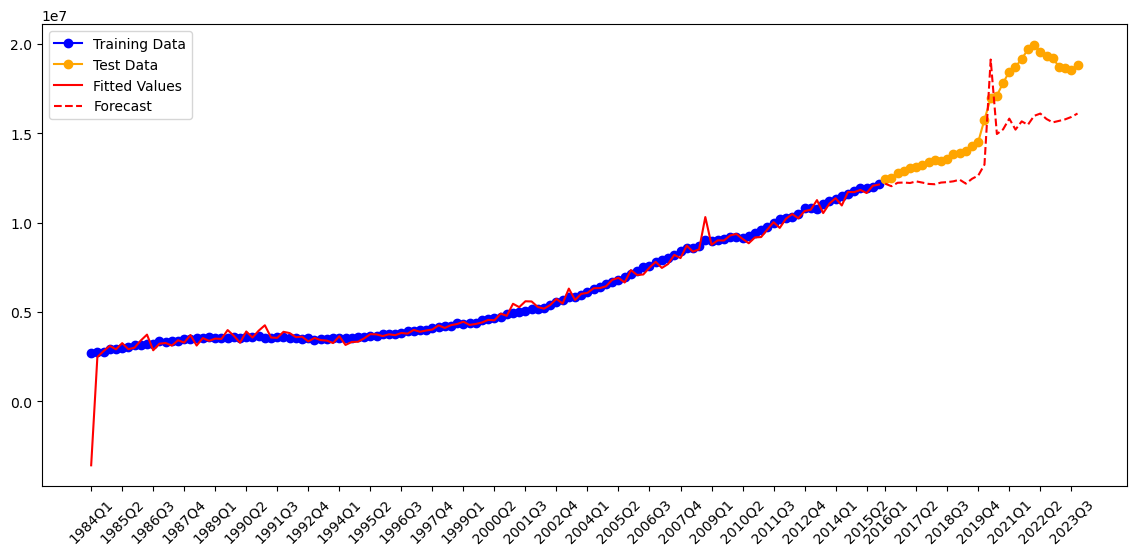

In [121]:
# Forecasting for the test period
forecast = sarima.get_forecast(steps=len(date_test), exog = scaler.transform(predictors_test.values)).predicted_mean

# Plot the results
plt.figure(figsize=(14, 6))

# Plot training data
plt.plot(date_train, dep_train, 'b-o', label='Training Data')

# Plot test data
plt.plot(date_test["Date"], dep_test.Deposits, color='orange', marker='o', label='Test Data')

# Plot fitted values for training data
plt.plot(date_train, sarima.fittedvalues, 'r', label='Fitted Values')

# Plot the forecast
plt.plot(date_test["Date"], forecast, '--r', label="Forecast")

# Add title with MASE if defined
if 'test_mase' in globals():
    plt.title("Test Set MASE = " + str(np.round(test_mase, 3)), fontsize=14)

# Customize x-axis ticks to display every 5th label with rotation
xticks = np.concatenate([date_train[::5], date_test["Date"][::5]])
plt.xticks(xticks, rotation=45, fontsize=10)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [123]:
rolling_avg_train_preds = dep_train.rolling(12).mean()
rolling_avg_test_preds = rolling_avg_train_preds.iloc[-1] * np.ones(len(dep_test))


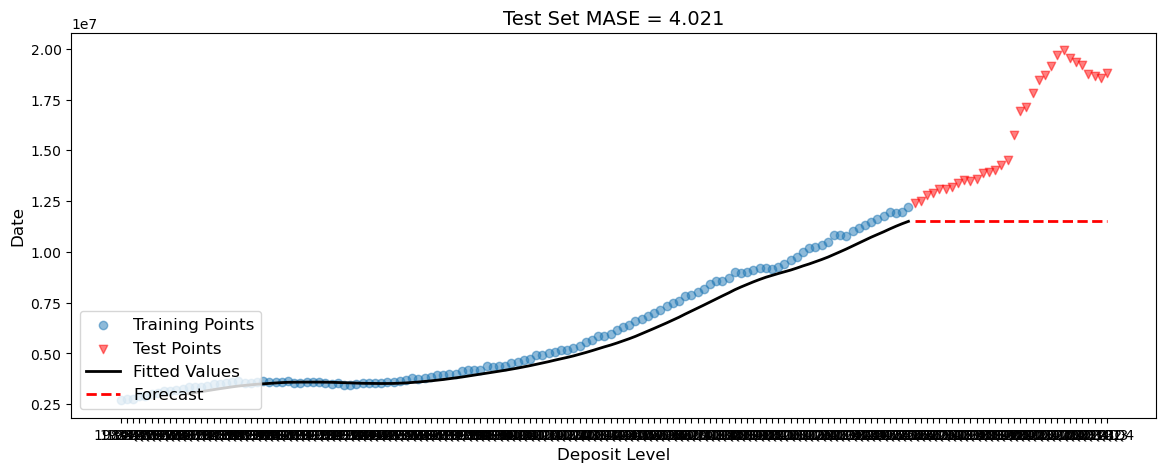

In [140]:
#baseline:
plt.figure(figsize=(14,5))
plt.scatter(df_train['Date'],
              dep_train,
               alpha=.5,
               label="Training Points")

plt.scatter(date_test.Date,
               dep_test.Deposits,
               alpha=.5,
               c = 'red',
               marker = 'v',
               label="Test Points")

plt.plot(df_train['Date'],
            rolling_avg_train_preds,
            'k-',
            linewidth = 2,
            label="Fitted Values")

plt.plot(date_test.Date,
            rolling_avg_test_preds,
            'r--',
            linewidth=2,
            label="Forecast")

plt.legend(fontsize=12, loc=3)

test_mase_base = mase(y_train = dep_train, y_test = dep_test.Deposits, y_preds = rolling_avg_test_preds)

plt.title("Test Set MASE = " + str(np.round(test_mase_base,3)),
             fontsize=14)

plt.xlabel("Deposit Level", fontsize=12)
plt.ylabel("Date", fontsize=12)






plt.show()

In [132]:
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom

## Model Evaluation

In [138]:
# # MASE analysis:

# test_mase = mase(y_train = dep_train.values, y_test = dep_test.Deposits.values, y_preds = sarima.forecast(len(dep_test)))


In [ ]:
# MASE analysis:

test_mase = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima.forecast(len(dep_test)))


In [ ]:
#k fold cross validation
#grid search for best seasonality


### Data Source: 
1. FDIC Quarterly Banking Profile: https://www.fdic.gov/quarterly-banking-profile
2. Dodd-Frank Act Stress Tests 2024: https://www.federalreserve.gov/supervisionreg/dfa-stress-tests-2024.htm